Analysis of the qualitative data answers

In [7]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

In [12]:
df_qualitative = pd.read_excel(r'Copy of UserTesting Respondents.xlsx')
#df_qualitative.head(2)
print(df_qualitative.columns)

Index(['UserTest Batch Date', 'Usertesting ID', 'Age',
       'Approximately how many employees does your organization have?',
       'What has your overall experience been in the technology field as a woman, trans, nonbinary person or of another gender?',
       'After completing the survey, do you have any final thoughts?',
       'Submitted At', 'How do you identify?',
       'Which of the following best describes you?', 'What is your ZIP code?',
       'Unnamed: 10',
       ' Which of the following best reflects your employment situation?\n',
       'Select all that apply to your responsibilities in your family?\n',
       'Select all that apply to your education experience?\n',
       'Are you a founder of your current company?\n', 'Unnamed: 15',
       'What is your job title?', 'Are you currently in a technical role?\n',
       'Were you previously in a technical role?\n', 'Unnamed: 19',
       'In the previous questions you told us you are currently in a technical role in which

In [13]:
#obtaining only qualitative data
df_qual_clean=pd.DataFrame([df_qualitative["Usertesting ID"],
df_qualitative["What has your overall experience been in the technology field as a woman, trans, nonbinary person or of another gender?"],
df_qualitative["Which of the following best describes you?"],
df_qualitative[" Which of the following best reflects your employment situation?\n"],
],index=["Usertesting ID","open_question","race","employment_status"],).T

df_qual_clean.head(3)

,Usertesting ID,open_question,race,employment_status
0,4134342S,A lot of the stereotypes are simultaneously tr...,White or Caucasian,Work full-time
1,4071135W,"Accomodating, treated the same, there were mor...",White or Caucasian,Work full-time
2,4037558O,"Adventurous, exciting, learning field, tasking...",Black or African American,Work freelance/Independent contractor/Consultant


In [14]:
from nltk.corpus import stopwords
def clean_tokenize(df):
    ps = PorterStemmer()
    tokenizer = RegexpTokenizer(r'\w+')
    clean_text = []
    stop_words = set(stopwords.words('english'))

    for answers in df["open_question"]:
        words = tokenizer.tokenize(answers)
        lower_words = [ps.stem(w.lower()) for w in words if w not in stop_words]
        clean_text.append(lower_words)
    df["tokenized_text"] = clean_text
    return df

clean_tokenize(df_qual_clean)
df_qual_clean.head(3)

,Usertesting ID,open_question,race,employment_status,tokenized_text
0,4134342S,A lot of the stereotypes are simultaneously tr...,White or Caucasian,Work full-time,"[a, lot, stereotyp, simultan, true, fals, as, ..."
1,4071135W,"Accomodating, treated the same, there were mor...",White or Caucasian,Work full-time,"[accomod, treat, ladi, technolog, class, male]"
2,4037558O,"Adventurous, exciting, learning field, tasking...",Black or African American,Work freelance/Independent contractor/Consultant,"[adventur, excit, learn, field, task, brain, w..."


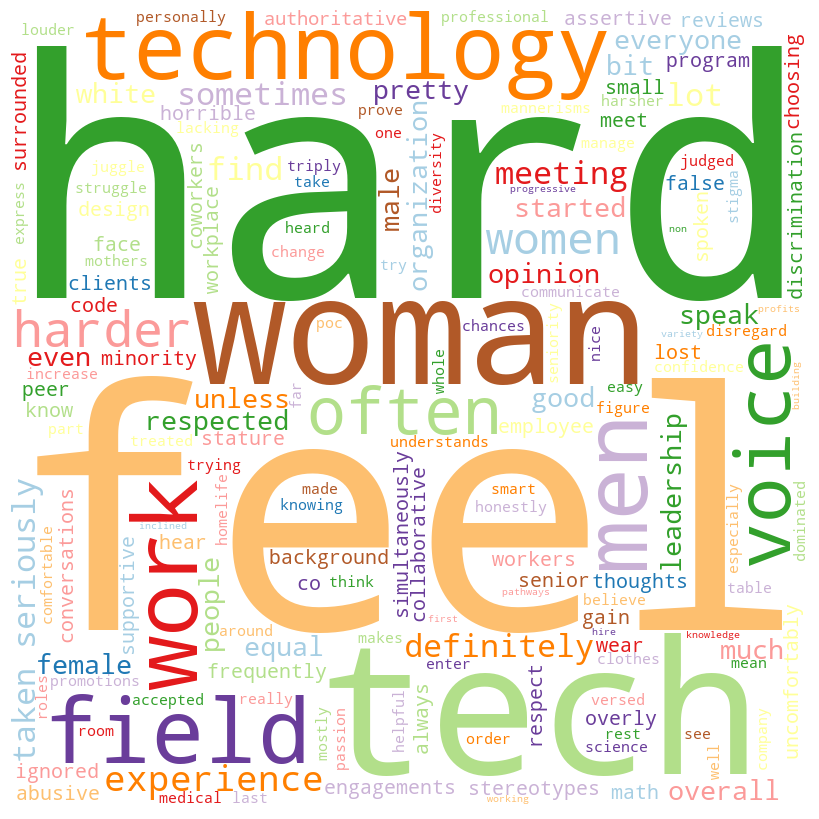

In [43]:
def word_cloud(df):
    words = ""
    """for answers in df["tokenized_text"]:
            words += " ".join(answers)+" "
            """
    words = "a lot of the stereotypes are simultaneously true and false as a more senior tech employee i don't face as much peer discrimination however during meetings i am frequently spoken over or my thoughts are ignored during code reviews or other \hard\ tech engagements i'm taken seriously but during meeting conversations i feel my voice is often lost in the background unless i am uncomfortably overly assertive as a woman in technology i often feel like a minority in my field sometimes i feel like i have to work harder to have my opinions respected and hear by clients and co-workers i don't often meet other women who design and program as a woman in the technology and math field i have always been surrounded by male voices and male coworkers in the workplace i know a lot of women in tech have horrible abusive experiences with the men they work with but my experience has been pretty supportive and collaborative however since i am a woman of a small stature it is often harder to gain respect in tech so i find myself choosing to wear more authoritative professional clothes and also speak louder than what my voice is comfortable at in order to get my voice heard and on the table i feel like i have to work triply as hard as everyone else to prove myself i feel like people disregard me or my opinion before even knowing me i have had to work harder for promotions than men do but overall am treated pretty equal as a woman it has honestly been hard for me i am not respected as much as i should be it's been a bit of a struggle my last company only had one woman in leadership the rest of leadership was made up of only white men i think it's sometimes hard to be taken seriously because i'm a woman i've also had to change my mannerisms at work to be more accepted by men it's been good for the most part there is a definitely more men than women and so it can hard to have your voice sometimes or to be taken seriously you just have to the confidence to speak up and try not to take it personally its definitely been not easy but i feel like there not a whole lot of women in the tech field so hard to find people to communicate with who understands especially for those in tech who are also mothers trying to juggle it all and just figure out how to manage work and homelife overall i do feel it is harder to enter the tech field as a woman i feel i am judged a bit harsher so far been good definitely see how as the roles increase in seniority the diversity is lacking and its mostly all white men but everyone is really nice and helpful but it is often hard in meetings when the only poc or female in the room the stigma around the men dominated field makes it harder to express my passion about technology and medical science just because female it doesn't mean i'm not as smart and well versed in the field of technology i believe that we have equal chances and knowledge about technology when i first started in the technology field it was hard to find work unless it was a progressive organization even with experience other organizations were not as inclined to hire me i started working in non profits and building experience in a variety of technology pathways "  
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10, colormap='Paired',).generate(words)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()
    return words
text = word_cloud(df_qual_clean)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import islice

sns.set(style="darkgrid")

def obtain_frequency(text):
    texts = text.split(" ")
    counter = Counter(texts)
    ordered_counter = counter.most_common(40)
    top10 = (dict(islice(counter.items(), 10)))
    print(ordered_counter)

    return top10

def plot_frequency(counter):
    #sns.histplot(x=counter.keys(), kde=True)
    pass
counter = obtain_frequency(text)
plot_frequency(counter)

[('i', 314), ('work', 74), ('experi', 67), ('woman', 64), ('feel', 63), ('women', 61), ('field', 55), ('technolog', 49), ('posit', 47), ('overal', 42), ('male', 40), ('men', 39), ('peopl', 37), ('it', 35), ('my', 34), ('tech', 33), ('like', 33), ('compani', 32), ('treat', 23), ('gender', 23), ('good', 21), ('lot', 19), ('as', 19), ('often', 19), ('respect', 19), ('think', 19), ('role', 19), ('femal', 18), ('differ', 18), ('sometim', 18), ('howev', 17), ('mani', 17), ('also', 17), ('serious', 16), ('know', 16), ('taken', 14), ('team', 14), ('organ', 14), ('pretti', 13), ('say', 13)]
